<a href="https://colab.research.google.com/github/ziishanahmad/human-activity-recognition/blob/main/human_activity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries for data manipulation and visualization
import numpy as np  # NumPy is used for numerical operations on large multi-dimensional arrays and matrices
import pandas as pd  # Pandas is used for data manipulation and analysis, particularly for working with tabular data
import matplotlib.pyplot as plt  # Matplotlib is a plotting library for creating static, animated, and interactive visualizations
import seaborn as sns  # Seaborn is a statistical data visualization library based on Matplotlib

# Import libraries for building and training the machine learning model
from sklearn.model_selection import train_test_split  # Train_test_split is used to split the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # StandardScaler is used to standardize features by removing the mean and scaling to unit variance
from sklearn.metrics import classification_report, confusion_matrix  # These functions are used to evaluate the performance of the machine learning model

# Import libraries for building neural network model
from tensorflow.keras.models import Sequential  # Sequential is a linear stack of layers for building neural networks
from tensorflow.keras.layers import Dense, LSTM, Dropout  # Layers for building the neural network model: Dense (fully connected layer), LSTM (Long Short-Term Memory layer), Dropout (regularization layer)


In [11]:
# Download and unzip the dataset using wget
# The dataset is downloaded from the UCI Machine Learning Repository and saved as UCI_HAR_Dataset.zip
!wget -q -O UCI_HAR_Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

# Unzip the downloaded dataset file to the directory ./UCI_HAR_Dataset
!unzip -q UCI_HAR_Dataset.zip -d ./UCI_HAR_Dataset

# Load the training and test datasets into Pandas dataframes
train_data = pd.read_csv('./UCI_HAR_Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
# The training data is loaded from 'X_train.txt' with space as delimiter and no header
train_labels = pd.read_csv('./UCI_HAR_Dataset/UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)
# The training labels are loaded from 'y_train.txt' with space as delimiter and no header
test_data = pd.read_csv('./UCI_HAR_Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
# The test data is loaded from 'X_test.txt' with space as delimiter and no header
test_labels = pd.read_csv('./UCI_HAR_Dataset/UCI HAR Dataset/test/y_test.txt', delim_whitespace=True, header=None)
# The test labels are loaded from 'y_test.txt' with space as delimiter and no header

# Load the feature names into a Pandas dataframe
features = pd.read_csv('./UCI_HAR_Dataset/UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)
# The feature names are loaded from 'features.txt' with space as delimiter and no header
feature_names = features[1].tolist()
# Convert the feature names to a list for easier usage

# Assign column names to the dataframes using the feature names
train_data.columns = feature_names
# Assign feature names to the columns of the training data
test_data.columns = feature_names
# Assign feature names to the columns of the test data

# Adjust the labels to be zero-indexed (range 0-5 instead of 1-6)
train_labels[0] = train_labels[0] - 1
test_labels[0] = test_labels[0] - 1

# Display the shape of the datasets to understand their dimensions
print(f'Train data shape: {train_data.shape}')
# Print the shape of the training data
print(f'Test data shape: {test_data.shape}')
# Print the shape of the test data


Train data shape: (7352, 561)
Test data shape: (2947, 561)


   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

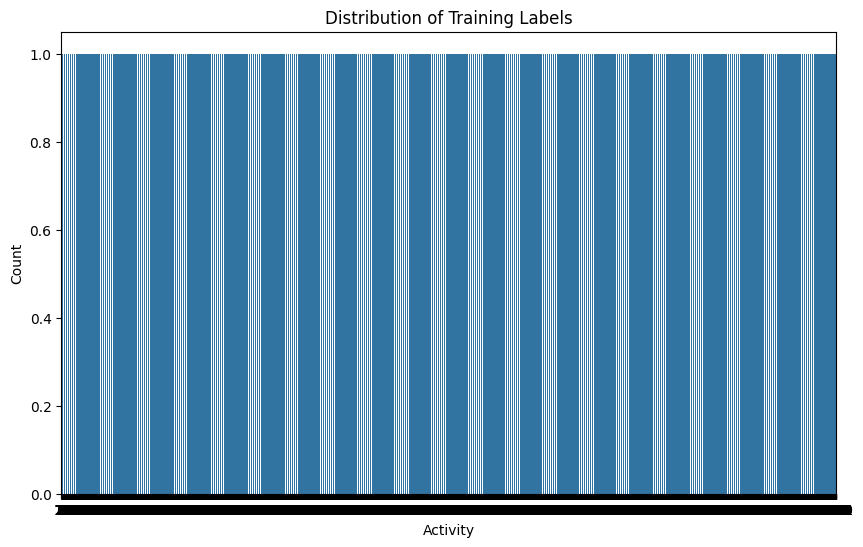

In [6]:
# Display the first few rows of the training data to understand its structure
print(train_data.head())

# Visualize the distribution of the training labels to see how many samples belong to each activity class
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(train_labels[0])  # Create a count plot of the training labels
plt.title('Distribution of Training Labels')  # Set the title of the plot
plt.xlabel('Activity')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.show()  # Display the plot


In [12]:
# Initialize the StandardScaler to standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Scale the training and test data using the StandardScaler
X_train = scaler.fit_transform(train_data)  # Fit the scaler on the training data and transform it
X_test = scaler.transform(test_data)  # Transform the test data using the already fitted scaler

# Convert the labels to numpy arrays for compatibility with the machine learning model
y_train = train_labels.values  # Convert training labels to numpy array
y_test = test_labels.values  # Convert test labels to numpy array


In [13]:
# Define the model architecture using the Sequential API
model = Sequential()

# Add the first LSTM layer with 100 units and return sequences
model.add(LSTM(100, input_shape=(X_train.shape[1], 1), return_sequences=True))
# LSTM layer with 100 units; input_shape is the number of features in the dataset; return_sequences=True to return the full sequence

# Add a dropout layer for regularization to prevent overfitting
model.add(Dropout(0.5))
# Dropout layer with a dropout rate of 0.5 (50%) to randomly drop half of the units

# Add the second LSTM layer with 100 units
model.add(LSTM(100))
# LSTM layer with 100 units; no need to specify input shape as it is inferred from the previous layer

# Add another dropout layer for regularization
model.add(Dropout(0.5))
# Dropout layer with a dropout rate of 0.5 (50%) to randomly drop half of the units

# Add the output dense layer with 6 units (one for each activity) and softmax activation
model.add(Dense(6, activation='softmax'))
# Dense layer with 6 units (corresponding to the 6 activity classes); softmax activation to output probabilities

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Adam optimizer for training the model; sparse categorical crossentropy loss for multi-class classification; accuracy as a metric

# Display the model architecture
model.summary()
# Print the summary of the model architecture, showing the layers and the number of parameters


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 561, 100)          40800     
                                                                 
 dropout_2 (Dropout)         (None, 561, 100)          0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 121806 (475.80 KB)
Trainable params: 121806 (475.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Reshape the data to fit the LSTM model
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# Reshape the training data to 3D shape (samples, timesteps, features) required by LSTM
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# Reshape the test data to 3D shape (samples, timesteps, features) required by LSTM

# Train the model using the training data
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)
# Fit the model to the training data; 10 epochs, batch size of 64, and 20% of the data used for validation


Epoch 1/10
92/92 [==============================] - 162s 2s/step - loss: 1.2261 - accuracy: 0.3846 - val_loss: 1.0687 - val_accuracy: 0.5595
Epoch 2/10
92/92 [==============================] - 164s 2s/step - loss: 0.9916 - accuracy: 0.5431 - val_loss: 0.9729 - val_accuracy: 0.6356
Epoch 3/10
92/92 [==============================] - 164s 2s/step - loss: 0.7373 - accuracy: 0.6655 - val_loss: 0.8236 - val_accuracy: 0.7247
Epoch 4/10
92/92 [==============================] - 165s 2s/step - loss: 0.6097 - accuracy: 0.7335 - val_loss: 0.7858 - val_accuracy: 0.7906
Epoch 5/10
92/92 [==============================] - 163s 2s/step - loss: 0.5558 - accuracy: 0.7660 - val_loss: 0.7181 - val_accuracy: 0.7899
Epoch 6/10
92/92 [==============================] - 163s 2s/step - loss: 0.4841 - accuracy: 0.8024 - val_loss: 0.7104 - val_accuracy: 0.8083
Epoch 7/10
92/92 [==============================] - 164s 2s/step - loss: 0.4395 - accuracy: 0.8201 - val_loss: 0.6722 - val_accuracy: 0.8300
Epoch 8/10
92

93/93 [==============================] - 21s 225ms/step - loss: 0.5773 - accuracy: 0.7974
Test Loss: 0.5773
Test Accuracy: 0.7974
93/93 [==============================] - 22s 230ms/step
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       496
           1       0.71      0.73      0.72       471
           2       0.85      0.62      0.71       420
           3       0.81      0.80      0.80       491
           4       0.76      0.82      0.79       532
           5       1.00      0.92      0.96       537

    accuracy                           0.80      2947
   macro avg       0.80      0.79      0.79      2947
weighted avg       0.81      0.80      0.80      2947



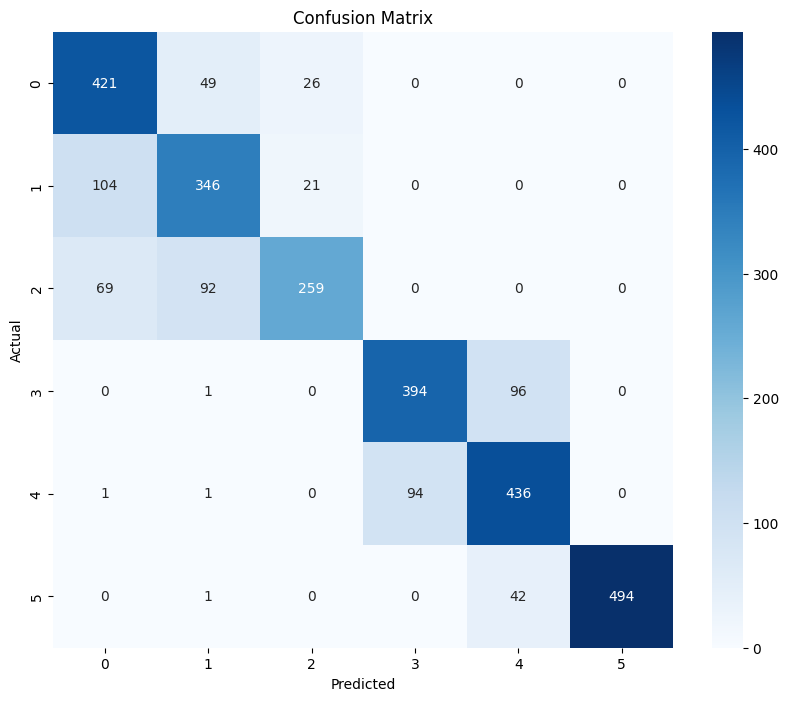

In [15]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
# Evaluate the model's performance on the test data and return the loss and accuracy
print(f'Test Loss: {test_loss:.4f}')
# Print the test loss with 4 decimal places
print(f'Test Accuracy: {test_accuracy:.4f}')
# Print the test accuracy with 4 decimal places

# Generate classification report to see detailed performance metrics
y_pred = np.argmax(model.predict(X_test_reshaped), axis=1)
# Predict the class probabilities for the test data and convert them to class labels
print(classification_report(y_test, y_pred))
# Print the classification report, showing precision, recall, and F1-score for each class

# Plot confusion matrix to visualize the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
# Compute the confusion matrix to evaluate the accuracy of the classification
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# Create a heatmap of the confusion matrix with annotations and a blue color map
plt.title('Confusion Matrix')  # Set the title of the plot
plt.xlabel('Predicted')  # Set the label for the x-axis
plt.ylabel('Actual')  # Set the label for the y-axis
plt.show()  # Display the plot
